# Documentation for Streprogen

In [1]:
%load_ext autoreload
%autoreload 2
import sys
from uuid import getnode as get_mac
mac = get_mac()
if mac == 115052582065254:
    sys.path.append(r'C:\Users\tommy\Desktop\streprogen2')

# Models

Some modeling functions for advanced users are available. These functions can be used to:

* Change the progression model used for the program.
* Change the intensity and repetitions used (as a function of time) in the program.
* Change the relationship between repetitions and intensity.

Keep in mind that these are advanced use-cases, the program will have **sensible defaults**.

## Progression models

Let us examine the progression models available and see how they will model progression in an 8 week training program.

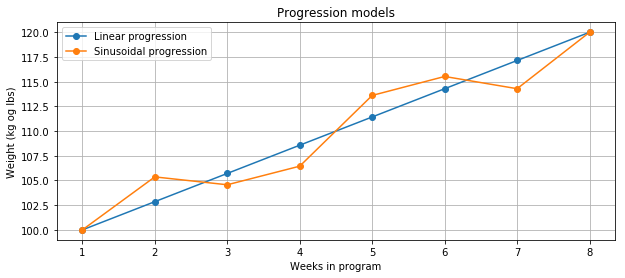

In [2]:
import matplotlib.pyplot as plt
from streprogen import progression_linear, progression_sinusoidal

# Initialize constants
start_weight = 100
end_weight = 120
start_week = 1
end_week = 8

# Get the progression models
weeks = list(range(start_week, end_week + 1))
weight_linear = [progression_linear(w, start_weight, end_weight, start_week, end_week) for w in weeks]
weight_sine = [progression_sinusoidal(w, start_weight, end_weight, start_week, end_week) for w in weeks]

# Create a plot
plt.figure(figsize = (10, 4))
plt.title('Progression models')
plt.plot(weeks, weight_linear, '-o', label = 'Linear progression')
plt.plot(weeks, weight_sine, '-o', label = 'Sinusoidal progression')
plt.xlabel('Weeks in program'); plt.ylabel('Weight (kg og lbs)')
plt.grid(True)
plt.legend(loc = 'best')
plt.show()

## Relationship between reps and intensity

Now we examine the relationship between reps and intensity. Three models are available:
* `reps_to_intensity`
* `reps_to_intensity_tight`, which is just a special case of `reps_to_intensity`
* `reps_to_intensity_relaxed`, which is just a special case of `reps_to_intensity`

Users can also create their own, but changing the `slope` argument in `reps_to_intensity` is probably sufficient.

In [3]:
from streprogen import reps_to_intensity, reps_to_intensity_tight, reps_to_intensity_relaxed

# Get intensities corresponding to reps in the 1-10 range
reps = list(range(1, 10 + 1))
intensity_normal = [reps_to_intensity(rep) for rep in reps]
intensity_tight = [reps_to_intensity_tight(rep) for rep in reps]
intensity_relaxed = [reps_to_intensity_relaxed(rep) for rep in reps]

print('Reps', *reps, sep = '\t')
print('-'*86)
print('Normal', *[round(i, 1) for i in intensity_normal], sep = '\t')
print('Tight', *[round(i, 1) for i in intensity_tight], sep = '\t')
print('Relaxed', *[round(i, 1) for i in intensity_relaxed], sep = '\t')

Reps	1	2	3	4	5	6	7	8	9	10
--------------------------------------------------------------------------------------
Normal	97.5	92.8	88.1	83.5	79.1	74.8	70.5	66.3	62.3	58.4
Tight	97.5	93.5	89.7	86.0	82.3	78.8	75.3	72.0	68.7	65.5
Relaxed	97.5	92.0	86.5	81.2	75.9	70.8	65.7	60.8	55.9	51.1


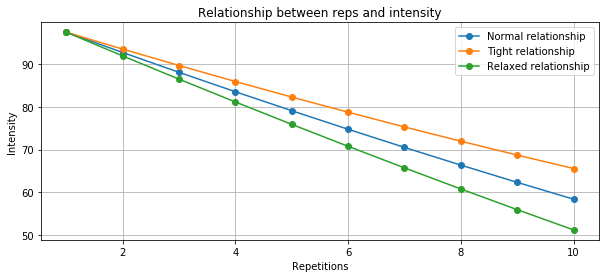

In [4]:
plt.figure(figsize = (10, 4))
plt.title('Relationship between reps and intensity')
plt.plot(reps, intensity_normal, 'o-', label = 'Normal relationship')
plt.plot(reps, intensity_tight, 'o-', label = 'Tight relationship')
plt.plot(reps, intensity_relaxed, 'o-', label = 'Relaxed relationship')
plt.xlabel('Repetitions'); plt.ylabel('Intensity')
plt.grid(True)
plt.legend(loc = 'best')
plt.show()

# Training programs

## Creating a simple program

This is a minimal example of a 3 week program, showing that default values are sensible for most users.   
Arguably 3 weeks is very short, but this length was chosen to minimize the print output.

In [11]:
from streprogen import Program, Day, DynamicExercise, StaticExercise

program = Program(name='A simple program with default values', duration=3)

# Create some exercises and put them in a day
squats = DynamicExercise(name = 'Squats', start_weight = 80, end_weight = 85)
curls = StaticExercise(name = 'Curls', sets_reps='4 x 10')
day = Day(exercises = [squats, curls])

# Add the day to the program and render it
program.add_days(day)
program.render()
print(program)

----------------------------------------------------------------
Program: A simple program with default values 

Parameters
  duration: 3
  reps_per_exercise: 25
  avg_intensity: 75
  reps_scalers: [0.8, 1.2, 1]
  intensity_scalers: [1.05, 0.95, 1]
  units: kg
----------------------------------------------------------------
Days and exercises
  Day 1
   Squats        80kg ->  85kg  reps: [3, 8]    weekly inc.: 2.0%
   Curls        4 x 10          
----------------------------------------------------------------
Week 1
 Day 1
   Squats   5 x 62.5kg  5 x 62.5kg  5 x 62.5kg  5 x 62.5kg  
   Curls    4 x 10

Week 2
 Day 1
   Squats   8 x 55kg    8 x 55kg    7 x 57.5kg  7 x 57.5kg  
   Curls    4 x 10

Week 3
 Day 1
   Squats   7 x 60kg    7 x 60kg    6 x 62.5kg  5 x 67.5kg  
   Curls    4 x 10

----------------------------------------------------------------


## Creating an intermediate program

This example shows more input parameters which the user might want to change or play around with.

In [35]:
from streprogen import Program, Day, DynamicExercise, StaticExercise

program = Program(name = 'My second training program', 
                  duration = 4, 
                  reps_per_exercise = 25, 
                  reps_scalers = [1.2, 1.05, 0.95, 0.8], 
                  avg_intensity = 75, 
                  intensity_scalers=[0.9, 0.95, 1.05, 1.1], 
                  units='kg', 
                  round_to=2.5,
                  minimum_percentile = 0)

# Create a day
dayA = Day('Day A')
squats = DynamicExercise(name = 'Squats', start_weight = 80, end_weight = 85, min_reps=2, max_reps=8)
curls = StaticExercise(name = 'Curls', sets_reps='4 x 10')
dayA.add_exercises(squats, curls)

dayB = Day('Day B')
bench = DynamicExercise(name = 'Benchpress', start_weight = 60, end_weight = 65, min_reps=2, max_reps=8)
chinups = StaticExercise(name = 'Chin ups', sets_reps='4 x 8')
dayB.add_exercises(bench, chinups)

# Add the day to the program
program.add_days(dayA, dayB)
program.render()
print(program)

----------------------------------------------------------------
Program: My second training program 

Parameters
  duration: 4
  reps_per_exercise: 25
  avg_intensity: 75
  reps_scalers: [1.2, 1.05, 0.95, 0.8]
  intensity_scalers: [0.9, 0.95, 1.05, 1.1]
  units: kg
----------------------------------------------------------------
Days and exercises
  Day A
   Squats        80kg ->  85kg  reps: [2, 8]    weekly inc.: 1.5%
   Curls        4 x 10          
  Day B
   Benchpress    60kg ->  65kg  reps: [2, 8]    weekly inc.: 2.0%
   Chin ups     4 x 8           
----------------------------------------------------------------
Week 1
 Day A
   Squats       8 x 52.5kg  8 x 52.5kg  7 x 57.5kg  7 x 57.5kg  
   Curls        4 x 10

 Day B
   Benchpress   8 x 40kg    8 x 40kg    7 x 42.5kg  7 x 42.5kg  
   Chin ups     4 x 8

Week 2
 Day A
   Squats       8 x 52.5kg  7 x 57.5kg  6 x 60kg    5 x 62.5kg  
   Curls        4 x 10

 Day B
   Benchpress   8 x 40kg    7 x 42.5kg  6 x 45kg    5 x 47.5kg

## More control with scalings

In [ ]:
import functools
duration = 6
weeks = list(range(1, duration + 1))

wave = functools.partial(progression_sinusoidal, start_weight = 1, end_weight = 1, start_week = 1, end_week = duration)

reps_scalers  = [wave(w, periods=2, scale=0.33) for w in weeks]
intensity_scalers  = [wave(w, periods=2,scale=0.1, offset=1) for w in weeks]

reps_scalers = list(map(lambda x: round(x, 3), reps_scalers))
intensity_scalers = list(map(lambda x: round(x, 3), intensity_scalers))




plt.figure(figsize = (8,4))
plt.title('Relationship between reps and intensity')
plt.plot(reps_scalers, '-o', label = 'Repetitions')
plt.plot(intensity_scalers, '-o', label = 'Intensity')
plt.xlabel('Weeks'); plt.ylabel('Scale')
plt.xticks([w-1 for w in weeks], weeks)
plt.grid(True)
plt.legend(loc = 'best')
plt.show()

In [ ]:
program = Program(name='My second program', 
                  duration=duration, 
                  reps_per_exercise=25, 
                  reps_scalers = reps_scalers,
                  intensity_scalers = intensity_scalers)

# Create a day
day = Day()
squats = DynamicExercise(name = 'Squats', start_weight = 100, end_weight = 100, min_reps=2, max_reps=8)
bench = DynamicExercise(name = 'Benchpress', start_weight = 100, end_weight = 100, min_reps=2, max_reps=8)
curls = StaticExercise(name = 'Curls', sets_reps='4 x 10')
day.add_exercises(squats, bench, curls)

# Add the day to the program
program.add_days(day)
program.render()
print(program.to_text(verbosity = 1))